# Recognising Handwritten Digits on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data Preparation

In [2]:
df = pd.read_csv('/home/anonymous_pk7/Desktop/Data_Science/KNN/train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
x = data[:,1:]
y = data[:,0]
print(x.shape,y.shape)

(42000, 784) (42000,)


In [10]:
split = int(0.8*x.shape[0])
print(split)

x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


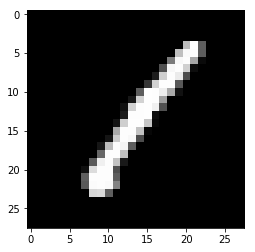

In [14]:
# Visualise some samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.show()
    

drawImg(x_train[0])    


### Step 2. K-NN

In [19]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(x,y,queryPoint,k=5):
    
    vals = []
    n = x.shape[0]
    
    for i in range(n):
        d = dist(queryPoint,x[i])
        vals.append((d,y[i]))
        
        
    vals = sorted(vals)
    # Nearest/First k points
    
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts = True)
    #Print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
        
    
    




### Step 3 : Make Predictions

In [26]:
pred = knn(x_train,y_train,x_test[9])

print(int(pred))

5


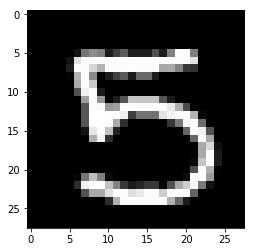

5


In [25]:

drawImg(x_test[9])
print(y_test[9])